<a href="https://colab.research.google.com/github/bhaskar0/CLV2024/blob/main/CLTV_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np
data = pd.read_excel("/content/Online_Retail_1.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
print(data.shape)

(541909, 8)


In [14]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()
print(filtered_data.shape)

(4389, 2)


<Axes: xlabel='Country'>

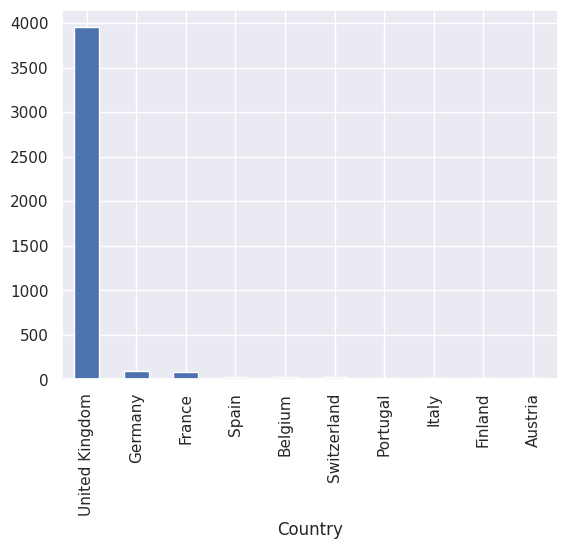

In [15]:
#Data Insights
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [16]:
uk_data=data[data.Country=='United Kingdom']
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.0+ MB


In [17]:
uk_data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,495478.000000,495478,495478.000000,361878.000000
mean,8.605486,2011-07-04 05:01:41.098131456,4.532422,15547.871368
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-27 12:06:00,1.250000,14194.000000
50%,3.000000,2011-07-19 11:47:00,2.100000,15514.000000
75%,10.000000,2011-10-20 10:41:00,4.130000,16931.000000
max,80995.000000,2011-12-09 12:49:00,38970.000000,18287.000000
std,227.588756,NaN,99.315438,1594.402590


#Removing customers who have ordered in a negative quantity

In [18]:
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 486286 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    486286 non-null  object        
 1   StockCode    486286 non-null  object        
 2   Description  485694 non-null  object        
 3   Quantity     486286 non-null  int64         
 4   InvoiceDate  486286 non-null  datetime64[ns]
 5   UnitPrice    486286 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      486286 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.4+ MB


#We need only five columns CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice. We can omit remaining columns.

In [19]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [20]:
#Calulate total purchase
uk_data['TotalPurchase'] = uk_data['Quantity'] * uk_data['UnitPrice']

Calculate the number of days between the present date and the date of last purchase from each customer.
Calculate the number of orders for each customer.
Calculate sum of purchase price for each customer.

In [21]:
uk_data_group=uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'TotalPurchase': lambda price: price.sum()})

In [22]:
print(uk_data_group.shape)
uk_data_group.head()

(3921, 4)


,InvoiceDate,InvoiceNo,Quantity,TotalPurchase
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4596,25748,33719.73
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


In [23]:
# Change the name of columns
uk_data_group.columns=['num_days','num_transactions','num_units','spent_money']
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4596,25748,33719.73
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


Calculate CLTV using following formula:
CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.
Customer Value = Average Order Value * Purchase Frequency

In [24]:
# Average Order Value
uk_data_group['avg_order_value']=uk_data_group['spent_money']/uk_data_group['num_transactions']

In [25]:
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value
CustomerID,,,,,
12346.0,0,1,74215,77183.60,77183.600000
12747.0,366,103,1275,4196.01,40.737961
12748.0,372,4596,25748,33719.73,7.336756
12749.0,209,199,1471,4090.88,20.557186
12820.0,323,59,722,942.34,15.971864


In [26]:
# Calculate Purchase Frequency
purchase_frequency=sum(uk_data_group['num_transactions'])/uk_data_group.shape[0]

In [27]:
# Calculate Repeat Rate and Churn Rate
repeat_rate=uk_data_group[uk_data_group.num_transactions > 1].shape[0]/uk_data_group.shape[0]

In [28]:
#Churn Rate
churn_rate=1-repeat_rate

In [29]:
purchase_frequency,repeat_rate,churn_rate

(90.37107880642694, 0.9818923743942872, 0.018107625605712774)

In [30]:
# Profit Margin
uk_data_group['profit_margin']=uk_data_group['spent_money']*0.05

In [31]:
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin
CustomerID,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800
12747.0,366,103,1275,4196.01,40.737961,209.8005
12748.0,372,4596,25748,33719.73,7.336756,1685.9865
12749.0,209,199,1471,4090.88,20.557186,204.5440
12820.0,323,59,722,942.34,15.971864,47.1170


In [32]:
#Calcualte Customer Lifetime Value
# Customer Value
uk_data_group['CLV']=(uk_data_group['avg_order_value']*purchase_frequency)/churn_rate
#Customer Lifetime Value
uk_data_group['cust_lifetime_value']=uk_data_group['CLV']*uk_data_group['profit_margin']
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
CustomerID,,,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800,3.852060e+08,1.486579e+12
12747.0,366,103,1275,4196.01,40.737961,209.8005,2.033140e+05,4.265538e+07
12748.0,372,4596,25748,33719.73,7.336756,1685.9865,3.661610e+04,6.173424e+07
12749.0,209,199,1471,4090.88,20.557186,204.5440,1.025963e+05,2.098545e+07
12820.0,323,59,722,942.34,15.971864,47.1170,7.971198e+04,3.755789e+06


#Prediction Model for CLTV. Here we will predict the CLTV using Linear regression model.

In [33]:
#Let's first use the data loaded and filtered above.
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPurchase
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [34]:
#Extract month and year from InvoiceDate.
uk_data['month_yr'] = uk_data['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))
uk_data.head()
#uk_data[uk_data.CustomerID == 12346.0]
#uk_data[uk_data.CustomerID == 12747.0]

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPurchase,month_yr
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30,Dec-2010
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00,Dec-2010
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010


The below pivot table calculates monthly expenses based on/group by Customer ID

In [35]:
sale=uk_data.pivot_table(index=['CustomerID'],columns=['month_yr'],values='TotalPurchase',aggfunc='sum',fill_value=0).reset_index()
sale.head()

month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011
0,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00
2,12748.0,1100.37,898.24,4228.13,1070.27,389.64,418.77,1113.27,2006.26,1179.37,2234.50,10639.23,2292.84,6148.84
3,12749.0,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00
4,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77


In [36]:
# sum all the months sales.
sale['CLV']=sale.iloc[:,2:].sum(axis=1)
sale.head()

month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV
0,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,77183.60
1,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00,4196.01
2,12748.0,1100.37,898.24,4228.13,1070.27,389.64,418.77,1113.27,2006.26,1179.37,2234.50,10639.23,2292.84,6148.84,32619.36
3,12749.0,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00,4090.88
4,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77,942.34


In [37]:
# Saving these details for reference
X1=sale[['CustomerID','Dec-2011','Nov-2011', 'Oct-2011','Sep-2011','Aug-2011','Jul-2011']]
y1=sale[['CLV']]
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,random_state=0)

In [38]:
# Divide above data into dependent and independent variable.
X=sale[['Dec-2011','Nov-2011', 'Oct-2011','Sep-2011','Aug-2011','Jul-2011']]
y=sale[['CLV']]

In [39]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [40]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [41]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[208.50969617]
[[0.99880551 0.80381254 1.60226829 1.67433228 1.52860813 2.87959449]]


In [42]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 0.9666074402817512


In [43]:
#Model Evaluation
# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 595.0282284701232
MSE 2114139.8898678925
RMSE: 1454.0082151995884


In [44]:
print(X_test.shape)
X_test.head()

(981, 6)


month_yr,Dec-2011,Nov-2011,Oct-2011,Sep-2011,Aug-2011,Jul-2011
538,0.0,0.00,0.00,0.00,0.0,0.0
3000,0.0,415.18,0.00,0.00,340.9,0.0
825,0.0,462.44,500.21,1261.81,0.0,0.0
924,62.5,643.63,0.00,0.00,0.0,0.0
3093,0.0,0.00,0.00,0.00,0.0,0.0


In [45]:
print(X1_test.shape)
X1_test.head()

(981, 7)


month_yr,CustomerID,Dec-2011,Nov-2011,Oct-2011,Sep-2011,Aug-2011,Jul-2011
538,13570.0,0.0,0.00,0.00,0.00,0.0,0.0
3000,16996.0,0.0,415.18,0.00,0.00,340.9,0.0
825,13988.0,0.0,462.44,500.21,1261.81,0.0,0.0
924,14126.0,62.5,643.63,0.00,0.00,0.0,0.0
3093,17128.0,0.0,0.00,0.00,0.00,0.0,0.0


In [46]:
print(y_pred.shape)
pd.DataFrame(y_pred).head()

(981, 1)


,0
0,208.509696
1,1063.339100
2,3494.384605
3,788.292906
4,208.509696


#Writing The Test Data + Predicted Column Into CSV File

In [47]:
df1 = pd.DataFrame(X1_test)
df2 = pd.DataFrame(y_pred)
submission = pd.concat([df1.reset_index(drop=True), df2.reset_index(drop=True)], axis=1)
submission.to_csv('CLTV Analysis 2024.csv', index=False)
submission.head()

,CustomerID,Dec-2011,Nov-2011,Oct-2011,Sep-2011,Aug-2011,Jul-2011,0
0,13570.0,0.0,0.00,0.00,0.00,0.0,0.0,208.509696
1,16996.0,0.0,415.18,0.00,0.00,340.9,0.0,1063.339100
2,13988.0,0.0,462.44,500.21,1261.81,0.0,0.0,3494.384605
3,14126.0,62.5,643.63,0.00,0.00,0.0,0.0,788.292906
4,17128.0,0.0,0.00,0.00,0.00,0.0,0.0,208.509696
